<a href="https://colab.research.google.com/github/yanruoz/ml0145_audio_emotion_classification/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
!git clone https://github.com/wendianaxu/speech-emotion-recognition.git

Cloning into 'speech-emotion-recognition'...
remote: Enumerating objects: 1497, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 1497 (delta 5), reused 25 (delta 5), pack-reused 1469
Receiving objects: 100% (1497/1497), 213.82 MiB | 20.42 MiB/s, done.
Resolving deltas: 100% (244/244), done.
Updating files: 100% (2883/2883), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import data
data_path = "/content/speech-emotion-recognition/RAVDESS_data/"
test_file = "/content/speech-emotion-recognition/RAVDESS_data/Actor_01/03-01-01-01-01-01-01.wav"
n_mfcc = 13 # common choice

def load_file(path):
  '''
  Load one audio file and return an 1D array containing its mfccs averaged across time
  '''
  audio, sampling_rate = librosa.load(path, sr=22050, duration=None)
  mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=n_mfcc) # extract MFCC matrix (cols = coefficients, rows = time)
  features = np.mean(mfccs.T, axis=0)  # condense MFCC matrix into 1D array, averaging each coefficient across time
  return features

test_mfccs = load_file(test_file)

# visualize mfccs
plt.figure(figsize=(25, 10))
librosa.display.specshow(test_mfccs, 
                         x_axis="Time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()


array([-6.9779260e+02,  5.4890041e+01,  6.6346717e-01,  1.2435785e+01,
        7.7339525e+00,  5.3074998e-01, -3.2166307e+00, -3.1593947e+00,
       -1.0977551e+01, -2.8487110e+00,  8.1529766e-01, -3.0370672e+00,
        1.9554471e+00], dtype=float32)

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

In [ ]:
def preprocess_data(path):
  '''
  Preprocess data in all folders within the dataset. 
  '''
  X = []
  y = []
  for folder in os.listdir(path): # each folder = one actor
      for file in os.listdir(os.path.join(path, folder)):
          if file.endswith('.wav'):
              emotion = file.split('-')[2] # get emotion label
              if int(emotion) == 1:
                  label = 'Neutral'
              elif int(emotion) == 2:
                  label = 'Calm'
              elif int(emotion) == 3:
                  label = 'Happy'
              elif int(emotion) == 4:
                  label = 'Sad'
              elif int(emotion) == 5:
                  label = 'Angry'
              elif int(emotion) == 6:
                  label = 'Fearful'
              elif int(emotion) == 7:
                  label = 'Disgust'
              elif int(emotion) == 8:
                  label = 'Surprised'
              else:
                  label = 'UNK'
                  
              file_path = os.path.join(path, folder, file)
              features = load_file(file_path)
              X.append(features)
              y.append(label)
  return np.array(X), np.array(y)

X, y = preprocess_data(data_path)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1440, 13)
Shape of y: (1440,)


In [ ]:
Neutral = []
Calm = []
Happy = []
Sad = []
Angry = []
Fearful = []
Disgust = []
Surprised = []
UNK = []

def emo_classification(X, y):
  for i in range(X.shape[0]):
    if y[i] == 'Neutral':
      Neutral.append(X[i])
    elif y[i] == 'Calm':
      Calm.append(X[i])
    elif y[i] == 'Happy':
      Happy.append(X[i])
    elif y[i] == 'Sad':
      Sad.append(X[i])
    elif y[i] == 'Angry':
      Angry.append(X[i])
    elif y[i] == 'Fearful':
      Fearful.append(X[i])
    elif y[i] == 'Disgust':
      Disgust.append(X[i])
    elif y[i] == 'Surprised':
      Surprised.append(X[i])
    elif y[i] == 'UNK':
      UNK.append(X[i])


In [ ]:
emo_classification(X, y)

In [78]:
def visualize_by_statement(path, intensity = '01', repetition = '01', actor = '01'):
  '''
   
  '''
  X = []
  y = []
  color = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta']
  x_values = range(13)
  for file in os.listdir(os.path.join(path, 'Actor_'+ actor)):
      if file.split('-')[3] == intensity and file.split('-')[5] == repetition:
          emotion = file.split('-')[2] # get emotion label
          if int(emotion) == 1:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[0])
          elif int(emotion) == 2:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[1])
          elif int(emotion) == 3:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[2])
          elif int(emotion) == 4:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[3])
          elif int(emotion) == 5:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[4])
          elif int(emotion) == 6:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[5])
          elif int(emotion) == 7:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[6])
          elif int(emotion) == 8:
              mfcc = load_file(os.path.join(path, 'Actor_'+ actor, file))
              plt.scatter(x_values, mfcc, color = color[7])
  
  plt.xlabel('Features')
  plt.ylabel('MFCC Values')
  plt.legend()
  plt.show()

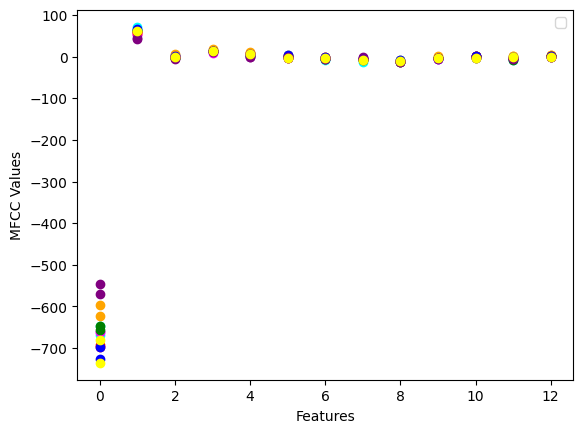

In [80]:
visualize_by_statement(data_path)